<a href="https://colab.research.google.com/github/aadhityamenon/general-project-fall25/blob/aadhityamenonbloodvisualization/AadhityaMenonEDA_Blood_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'blood-cells' dataset.
Path to dataset files: /kaggle/input/blood-cells/dataset2-master/dataset2-master/images
       EOSINOPHIL  LYMPHOCYTE  NEUTROPHIL  MONOCYTE  Total
TRAIN        2497        2483        2499      2478   9957
TEST          623         620         624       620   2487
VAL             0           0           0         0      0


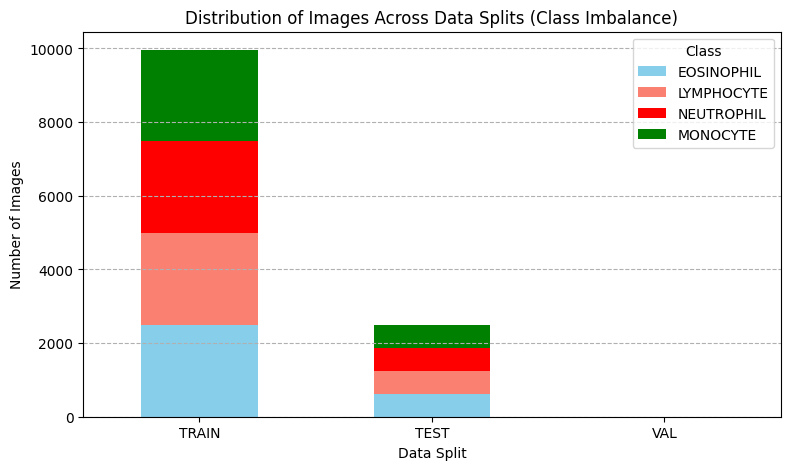

In [11]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/blood-cells")
path = path = "/kaggle/input/blood-cells/dataset2-master/dataset2-master/images"
print("Path to dataset files:", path)

def count_images(data_path):
    try:
        def valid_files(folder):
            return [f for f in os.listdir(folder) if not f.startswith('.')]
        eos_count = len(valid_files(os.path.join(data_path,'EOSINOPHIL')))
        lym_count = len(valid_files(os.path.join(data_path,'LYMPHOCYTE')))
        neu_count = len(valid_files(os.path.join(data_path,'NEUTROPHIL')))
        mono_count = len(valid_files(os.path.join(data_path,'MONOCYTE')))
        return eos_count, lym_count, neu_count, mono_count
    except FileNotFoundError:
        return 0,0,0,0

data = {}
for split in ['TRAIN', 'TEST', 'VAL']:
    eos_count, lym_count, neu_count, mono_count = count_images(os.path.join(path, split))
    data[split] = [eos_count, lym_count, neu_count, mono_count]

df = pd.DataFrame(data, index=['EOSINOPHIL','LYMPHOCYTE','NEUTROPHIL','MONOCYTE']).T
df['Total'] = df.sum(axis=1)
print(df)

df[['EOSINOPHIL', 'LYMPHOCYTE', 'NEUTROPHIL', 'MONOCYTE']].plot(
    kind='bar',
    stacked=True,
    figsize=(9, 5),
    color=['skyblue', 'salmon', 'red', 'green']
)
plt.title('Distribution of Images Across Data Splits (Class Imbalance)')
plt.ylabel('Number of Images')
plt.xlabel('Data Split')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.grid(axis='y', linestyle='--')
plt.show()


In [14]:
image_labels = defaultdict(set)
splits = os.listdir(path)

for split in splits:
    split_path = os.path.join(path, split)
    for label in ['EOSINOPHIL', 'LYMPHOCYTE', 'NEUTROPHIL', 'MONOCYTE']:
        folder = os.path.join(split_path, label)
        if not os.path.exists(folder):
            continue
        for file in os.listdir(folder):
            image_labels[file].add(label)

multi_label = {img: lbls for img, lbls in image_labels.items() if len(lbls) > 1}

print(f"Images with more than one label: {len(multi_label)}")
for img, lbls in list(multi_label.items())[:10]:
    print(img, "→", lbls)


Images with more than one label: 132
_0_5239.jpeg → {'MONOCYTE', 'LYMPHOCYTE', 'EOSINOPHIL'}
_0_2963.jpeg → {'LYMPHOCYTE', 'EOSINOPHIL'}
_10_2029.jpeg → {'LYMPHOCYTE', 'EOSINOPHIL'}
_0_4055.jpeg → {'MONOCYTE', 'EOSINOPHIL'}
_0_967.jpeg → {'LYMPHOCYTE', 'EOSINOPHIL'}
_7_6742.jpeg → {'NEUTROPHIL', 'EOSINOPHIL'}
_8_4566.jpeg → {'MONOCYTE', 'EOSINOPHIL'}
_1_2584.jpeg → {'LYMPHOCYTE', 'EOSINOPHIL'}
_9_9174.jpeg → {'MONOCYTE', 'EOSINOPHIL'}
_7_9769.jpeg → {'MONOCYTE', 'EOSINOPHIL'}
